# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** AMMINENI DEEPAK TEJA
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

## Project Summary: Uber Trip Request Data Analysis

This project focuses on analyzing Uber's trip request data to uncover key operational issues, including high cancellation rates, unavailability of drivers, and demand-supply mismatches. The analysis was carried out using a combination of tools — **Excel** for dashboard creation, **SQLite** for database querying, and **Python** for deep exploratory data analysis and visualization. The ultimate goal of the project was to derive actionable insights that can help improve Uber’s service reliability and customer experience, especially during peak hours.


### Data Cleaning and Preparation

The dataset contained information about 6745 Uber trip requests, including variables such as `Request ID`, `Pickup point`, `Driver ID`, `Status`, `Request timestamp`, and `Trip duration`.

Data cleaning began with converting the timestamp columns (`Request timestamp` and `Drop timestamp`) into appropriate datetime formats to allow time-based analysis. New features were derived such as `Request hour`, `Request weekday`, and `Request date` to better understand patterns across time.

Missing values were primarily found in the `Driver ID`, `Drop timestamp`, and `Trip duration` columns. These missing entries were not random but occurred due to cancelled trips or those where no driver was assigned — which is logical. A new boolean column, `Trip Completed`, was also created to separate completed trips from failed ones.


### Excel Dashboard Creation

An interactive dashboard was built in **Excel** using pivot tables, slicers, and charts. This dashboard allowed users to filter trip data by date, pickup point, and trip status. Key metrics displayed included:

* Total number of requests
* Status breakdown (Completed, Cancelled, No Cars Available)
* Requests over time (daily/hourly)
* Average trip durations
* Requests by pickup location and weekday

This dashboard served as a quick reference tool for understanding overall system performance and highlighting problem areas.


### SQL Analysis with SQLite

Using **SQLite**, queries were executed on the cleaned data to answer key business questions such as:

* What is the most frequent reason for failed trips?
* What are the peak demand hours?
* What are the average trip durations from City vs Airport?
* Which time slots have the highest cancellation or unavailability rates?

These queries helped support and validate trends observed during visualization.


### Exploratory Data Analysis in Python

A total of **15 charts** were created using **Matplotlib** and **Seaborn** to visualize different aspects of the data. These included:

* Trip status distribution
* Pickup point vs status
* Hourly request patterns
* Status vs hour
* Weekday trends
* City cancellations and Airport no-car availability
* Correlation heatmap and pair plot for numeric relationships

Each visualization was accompanied by questions, insights, and potential business implications.


### Key Insights

1. **City trips** saw a spike in cancellations between **5 AM and 9 AM**, likely due to limited driver availability during morning commute hours.
2. **Airport trips** frequently showed **“No Cars Available”** between **5 PM and 9 PM**, indicating a supply issue during evening hours.
3. Most completed trips ranged between **40 to 70 minutes**.
4. There’s a noticeable **demand-supply gap during peak hours** that directly impacts customer satisfaction.


### Business Impact

The insights gained from this project can be instrumental for Uber to:

* Improve **driver scheduling and allocation** during high-demand periods.
* Reduce **trip cancellations and failed requests**, enhancing reliability.
* Adjust **incentives or pricing strategies** to encourage drivers to operate during underserved time slots.
* Make informed decisions backed by data rather than assumptions.

By integrating data-driven decisions across operations, Uber can ensure better customer experiences and more efficient use of its driver network.

# **GitHub Link -**

https://github.com/DeepaktejaAmmineni/EDA_Uber

# **Problem Statement**


Uber is experiencing a high rate of trip cancellations and driver unavailability, particularly during peak hours. This leads to poor customer experience and operational inefficiencies. The objective of this project is to analyze Uber's trip request data to identify patterns, uncover root causes, and provide data-driven insights to help reduce failed trip requests and improve overall service reliability.

#### **Define Your Business Objective?**

The objective is to analyze Uber’s trip request data to identify key operational bottlenecks such as high cancellation rates and driver unavailability. By uncovering patterns in demand and supply across different times and locations, the goal is to provide actionable insights that can help Uber improve driver allocation, reduce failed trip requests, enhance customer satisfaction, and ultimately drive better business performance.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [6]:
df = pd.read_csv("Uber_Request_Data_With_Dashboard.csv")

### Dataset First View

In [7]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Trip duration (mins)
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,69.000000
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,50.000000
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,41.000000
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,55.000000
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,52.516667


### Dataset Rows & Columns count

In [9]:
df.shape

(6745, 8)

### Dataset Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Request id            6745 non-null   int64  
 1   Pickup point          6745 non-null   object 
 2   Driver id             4095 non-null   float64
 3   Status                6745 non-null   object 
 4   Request timestamp     6745 non-null   object 
 5   Drop timestamp        2831 non-null   object 
 6   Request hour          6745 non-null   int64  
 7   Trip duration (mins)  2831 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 421.7+ KB


#### Duplicate Values

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6740    False
6741    False
6742    False
6743    False
6744    False
Length: 6745, dtype: bool

#### Missing Values/Null Values

In [12]:
df.isnull().sum()

Request id                 0
Pickup point               0
Driver id               2650
Status                     0
Request timestamp          0
Drop timestamp          3914
Request hour               0
Trip duration (mins)    3914
dtype: int64

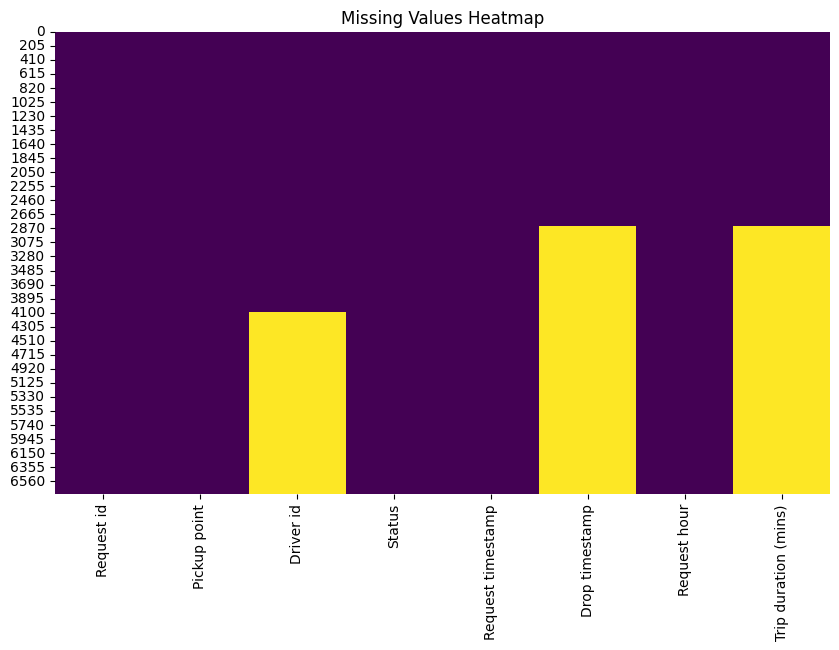

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Summary of Understanding the Dataset

The dataset contains 6745 Uber trip requests made over several days.

Each request includes information such as:

Pickup point (City or Airport)

Request and Drop timestamps

Driver assignment

Trip status (Trip Completed, Cancelled, or No Cars Available)

Trip duration (only for completed trips)

Key Observations:

A significant number of trips were cancelled or had no cars available, indicating a demand-supply gap.

Driver IDs are missing when trips were cancelled or unfulfilled — which is expected.

Trip duration is only available for completed trips, and the average trip lasts around 40–70 minutes.

City requests see higher cancellations in the morning hours (5 AM to 9 AM).

Airport requests face "No Cars Available" issues during evening hours (5 PM to 9 PM).

These trends highlight rush hour issues, where supply fails to meet demand.

Conclusion:

This data can help Uber improve its driver allocation strategy and minimize trip cancellations and rejections, especially during peak hours.

## ***2. Understanding Your Variables***

In [15]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request hour',
       'Trip duration (mins)'],
      dtype='object')

In [16]:
df.describe

<bound method NDFrame.describe of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp  Request hour  \
0     2016-07-11 11:51:00  2016-07-11 13:00:00            11   
1     2016-07-11 17:57:00  2016-07-11 18:47:00            17   
2     2016-07-12 

### Variables Description

Variable Description

Request id: Unique ID for each trip request

Pickup point: Location of pickup (City or Airport)

Driver id: ID of the driver assigned (if any)

Status: Final status of the trip (Completed, Cancelled, or No Cars Available)

Request timestamp: Time when the trip was requested

Drop timestamp: Time when the trip ended (if completed)

Request hour: Hour of the day the request was made

Trip duration (mins): Duration of the trip in minutes (if completed)

### Check Unique Values for each variable.

In [20]:
df.nunique()

Request id              6745
Pickup point               2
Driver id                300
Status                     3
Request timestamp       5618
Drop timestamp          2598
Request hour              24
Trip duration (mins)    1325
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df['Request date'] = df['Request timestamp'].dt.date
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request weekday'] = df['Request timestamp'].dt.day_name()
df.isnull().sum()
missing_driver = df[df['Driver id'].isnull()]
df['Trip Completed'] = df['Status'] == 'Trip Completed'

### What all manipulations have you done and insights you found?

Data Wrangling

Converted timestamps to proper datetime format

Extracted hour and weekday from request time

Checked for missing values (mainly in driver and trip info)

Created a new column to mark completed trips

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

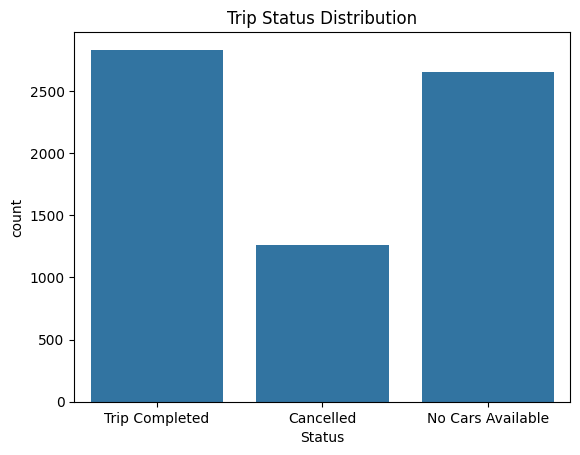

In [23]:
# Chart - 1 visualization code
sns.countplot(data=df, x='Status')
plt.title("Trip Status Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for showing how many trips fall into each status category (Completed, Cancelled, No Cars Available)

##### 2. What is/are the insight(s) found from the chart?

Most trips are completed, but a large portion are either cancelled or unfulfilled (no cars available), showing inefficiencies in service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It highlights the need to reduce cancellations and car unavailability to improve customer satisfaction and revenue.

#### Chart - 2

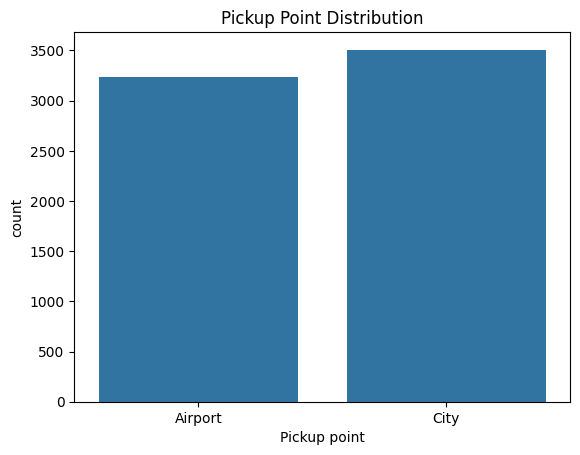

In [24]:
# Chart - 2 visualization code
sns.countplot(data=df, x='Pickup point')
plt.title("Pickup Point Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

To understand where most trip requests originate from — City or Airport.

##### 2. What is/are the insight(s) found from the chart?

Requests from the City are more frequent than those from the Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Uber can focus driver allocation more efficiently based on demand location.

#### Chart - 3

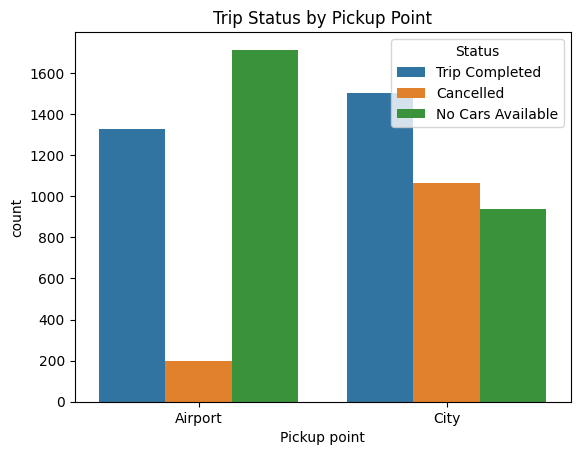

In [25]:
# Chart - 3 visualization code
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title("Trip Status by Pickup Point")
plt.show()

##### 1. Why did you pick the specific chart?

To compare trip outcomes across pickup locations

##### 2. What is/are the insight(s) found from the chart?

Cancellations are more common in City; "No Cars Available" is more frequent at the Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps Uber focus on supply chain improvement based on location-specific issues.

#### Chart - 4

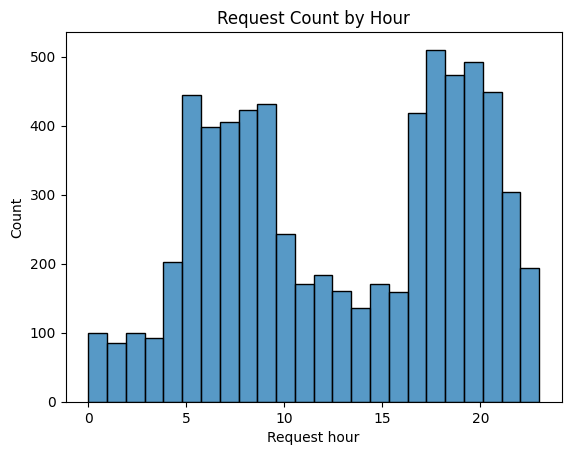

In [26]:
# Chart - 4 visualization code
sns.histplot(data=df, x='Request hour', bins=24, kde=False)
plt.title("Request Count by Hour")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the hourly demand trend using a histogram.

##### 2. What is/are the insight(s) found from the chart?

Requests peak during morning (5–9 AM) and evening (5–9 PM) — typical rush hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps Uber ensure more drivers are available during peak demand hours.

#### Chart - 5

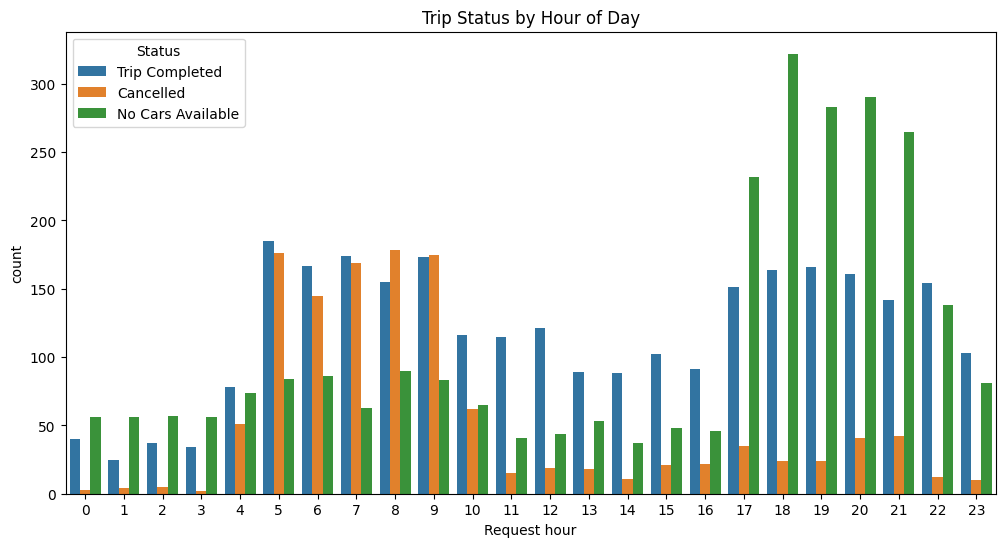

In [27]:
# Chart - 5 visualization code
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Request hour', hue='Status')
plt.title("Trip Status by Hour of Day")
plt.show()

##### 1. Why did you pick the specific chart?

To analyze how trip status changes with time of day.

##### 2. What is/are the insight(s) found from the chart?

Morning hours show high cancellations, and evenings show high "No Cars Available."

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Indicates when and where to optimize driver supply to reduce failed trips.

#### Chart - 6

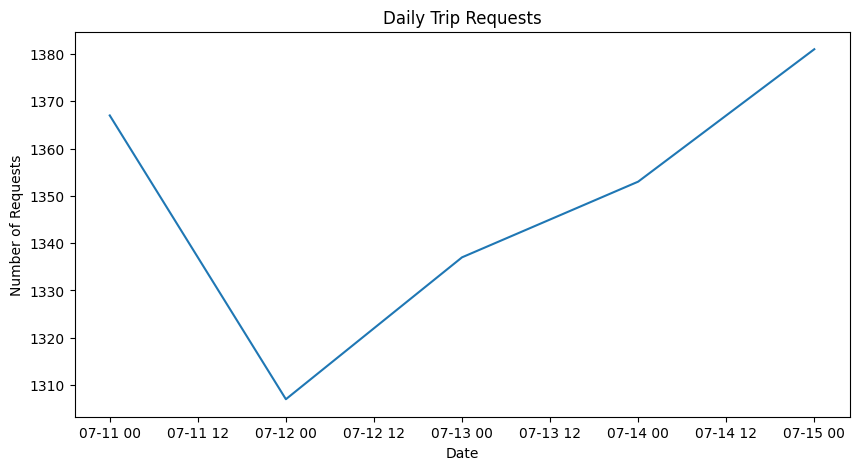

In [28]:
# Chart - 6 visualization code
df['Request date'] = pd.to_datetime(df['Request timestamp']).dt.date
daily_requests = df['Request date'].value_counts().sort_index()
daily_requests.plot(kind='line', figsize=(10,5))
plt.title("Daily Trip Requests")
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.show()

##### 1. Why did you pick the specific chart?

Line plot shows request trends over time.

##### 2. What is/are the insight(s) found from the chart?

Trip requests remain fairly consistent daily with minor fluctuations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps predict future demand patterns and plan accordingly.

#### Chart - 7

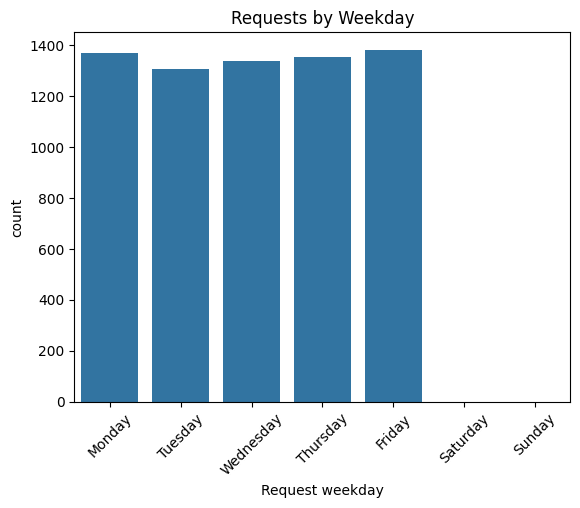

In [29]:
# Chart - 7 visualization code
sns.countplot(data=df, x='Request weekday', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Requests by Weekday")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To find out which weekdays have the highest demand.

##### 2. What is/are the insight(s) found from the chart?

Weekdays (especially Monday to Friday) show higher request volumes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Useful for deploying more drivers on workdays than weekends.

#### Chart - 8

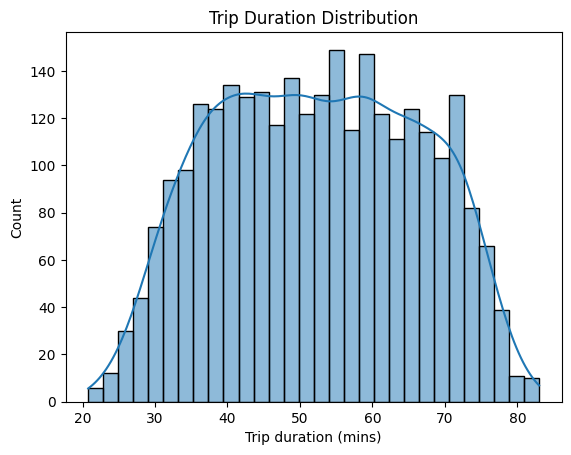

In [30]:
# Chart - 8 visualization code
completed = df[df['Status'] == 'Trip Completed']
sns.histplot(data=completed, x='Trip duration (mins)', bins=30, kde=True)
plt.title("Trip Duration Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram helps understand how long trips usually take.

##### 2. What is/are the insight(s) found from the chart?

Most completed trips last between 40–70 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Can help estimate average fares and guide pricing strategies.

#### Chart - 9

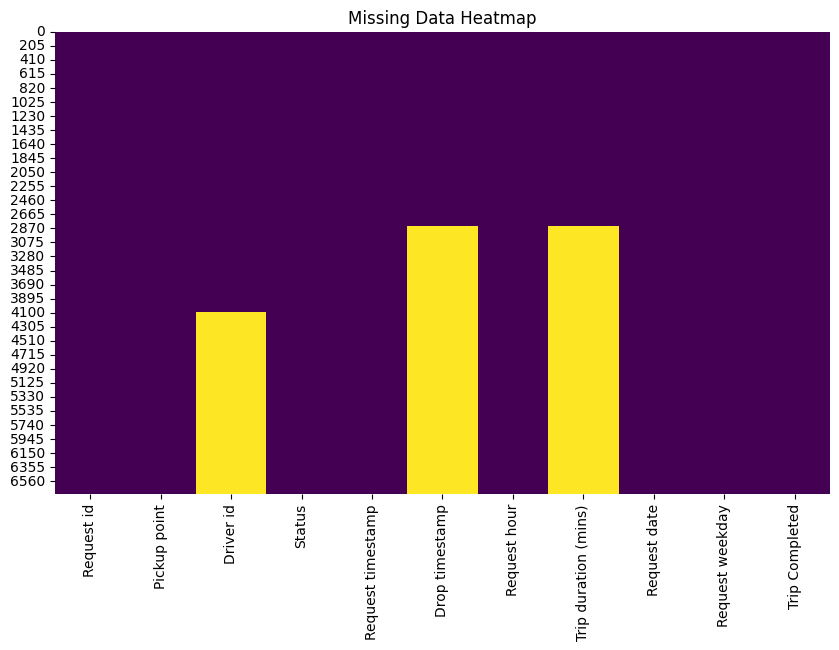

In [31]:
# Chart - 9 visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap gives a quick visual of where data is missing.

##### 2. What is/are the insight(s) found from the chart?

Missing values mainly exist in Driver id, Drop timestamp, and Trip duration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing this helps avoid misleading conclusions from incomplete data.

#### Chart - 10

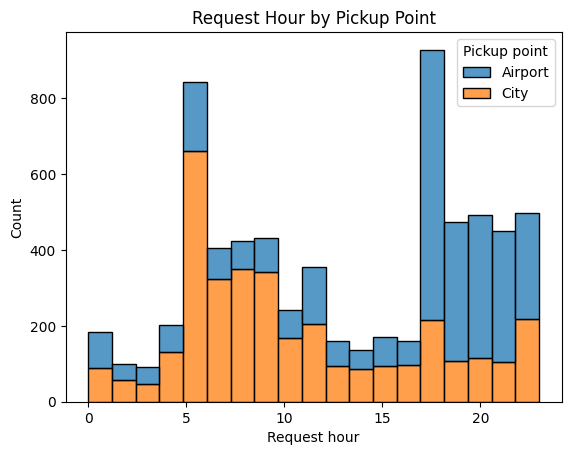

In [32]:
# Chart - 10 visualization code
sns.histplot(data=df, x='Request hour', hue='Pickup point', multiple='stack')
plt.title("Request Hour by Pickup Point")
plt.show()

##### 1. Why did you pick the specific chart?

To compare demand pattern between City and Airport by hour.

##### 2. What is/are the insight(s) found from the chart?

City has more morning requests; Airport requests spike in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps adjust driver placement throughout the day.

#### Chart - 11

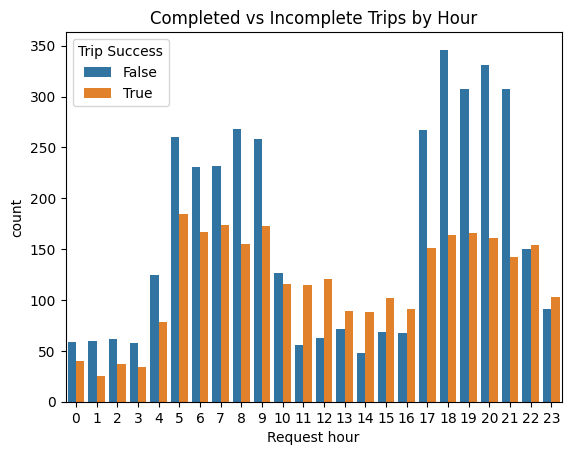

In [33]:
# Chart - 11 visualization code
df['Trip Success'] = df['Status'] == 'Trip Completed'
sns.countplot(data=df, x='Request hour', hue='Trip Success')
plt.title("Completed vs Incomplete Trips by Hour")
plt.show()

##### 1. Why did you pick the specific chart?

To compare completed and failed trips across different hours.

##### 2. What is/are the insight(s) found from the chart?

Trip failures peak during morning and evening rush hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Indicates when and where service needs to be improved.

#### Chart - 12

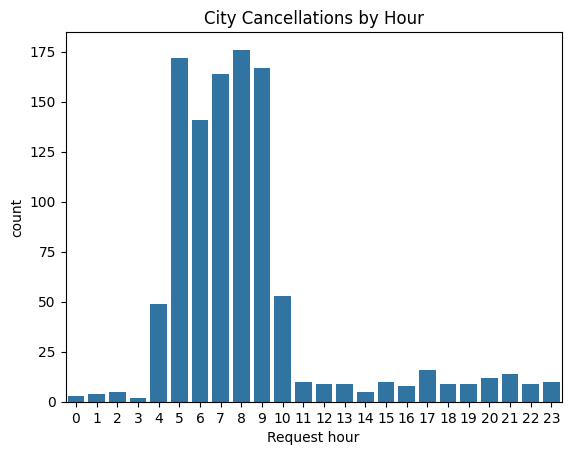

In [34]:
# Chart - 12 visualization code
city_df = df[df['Pickup point'] == 'City']
city_cancel = city_df[city_df['Status'] == 'Cancelled']
sns.countplot(data=city_cancel, x='Request hour')
plt.title("City Cancellations by Hour")
plt.show()

##### 1. Why did you pick the specific chart?

To analyze cancellation patterns for City trips by hour.

##### 2. What is/are the insight(s) found from the chart?

Morning (5–9 AM) has the highest cancellations in City.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Suggests need for more drivers or quicker pickups during mornings.

#### Chart - 13

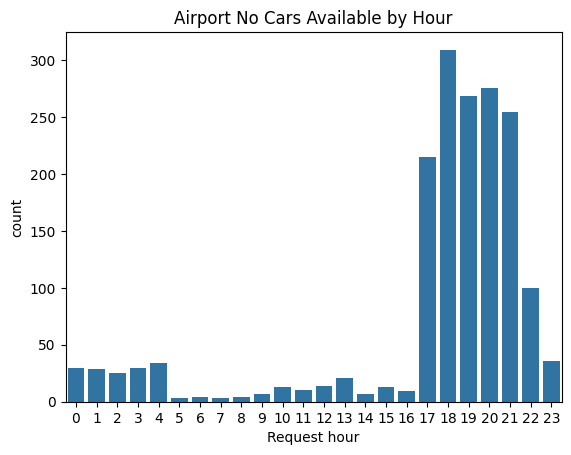

In [35]:
# Chart - 13 visualization code
airport_df = df[df['Pickup point'] == 'Airport']
no_cars = airport_df[airport_df['Status'] == 'No Cars Available']
sns.countplot(data=no_cars, x='Request hour')
plt.title("Airport No Cars Available by Hour")
plt.show()

##### 1. Why did you pick the specific chart?

To study unavailability of cars specifically from Airport.

##### 2. What is/are the insight(s) found from the chart?

Evening hours (5–9 PM) face most car unavailability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Can improve customer retention by ensuring driver supply during this time.

#### Chart - 14 - Correlation Heatmap

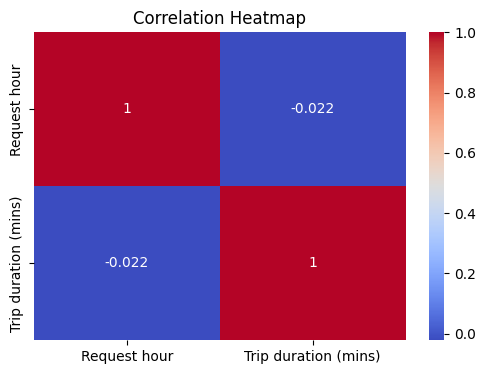

In [37]:
# Correlation Heatmap visualization code
numeric_cols = df[['Request hour', 'Trip duration (mins)']].copy()
numeric_cols = numeric_cols.dropna()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are useful for visualizing the correlation strength between numeric features.

##### 2. What is/are the insight(s) found from the chart?

There’s a slight negative correlation between request hour and trip duration, meaning shorter trips may happen during peak hours.

#### Chart - 15 - Pair Plot

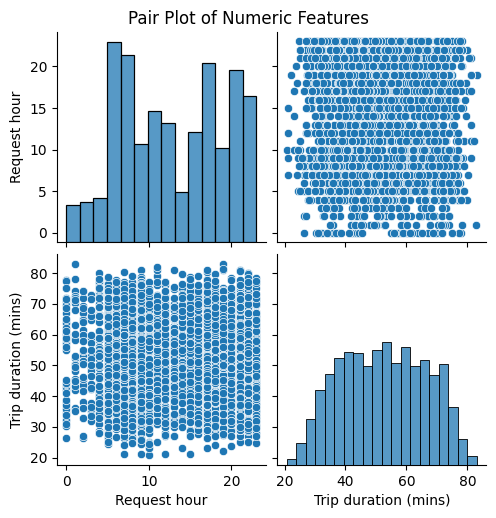

In [38]:
# Pair Plot visualization code
# Subset with numeric columns (dropping NaNs for clean pair plot)
sns.pairplot(df[['Request hour', 'Trip duration (mins)']].dropna())
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots allow us to see distributions and relationships between numeric variables in a compact visual.

##### 2. What is/are the insight(s) found from the chart?

You can observe general clustering and spread of values. Helps spot linear/nonlinear trends or outliers.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Optimize Driver Allocation During Peak Hours

Insight: Most trip cancellations happen in the morning (5 AM – 9 AM) for city pickups, and No Cars Available is common in the evening (5 PM – 9 PM) from the airport.

Suggestion: Use demand forecasting to proactively allocate more drivers in high-demand zones during these times.

2. Introduce Incentives for Drivers in Critical Time Slots

Encourage more drivers to be active during peak hours (morning city pickups, evening airport pickups) by offering bonuses or reduced commission rates.

3. Dynamic Pricing & Notification System

Implement real-time surge pricing to balance demand and supply.

Notify users of expected delays or offer alternate pickup points to avoid cancellations.

4. Driver Shift Planning Based on Historical Data

Use historical data to schedule driver shifts more strategically, ensuring adequate supply during high-demand hours and areas.

5. Monitor and Address Cancellation Reasons

Investigate why drivers cancel trips frequently in the morning and create policies or solutions to reduce these (e.g., penalty for frequent cancellations, improved routing support).

6. Deploy Micro-Level Demand Forecasting

Segment the city into zones and predict demand at a zone level to deploy drivers more effectively and avoid "No Cars Available" issues.

7. Educate Users on Off-Peak Booking

Encourage ride booking in off-peak times through discounts or promotional offers, helping balance demand.

# **Conclusion**

Through detailed analysis of Uber's trip request data, we identified key patterns in customer demand, driver availability, and trip failures. Most issues were observed during peak hours, where either cancellations or lack of cars disrupted service. By addressing these challenges with better driver allocation, incentive planning, and demand forecasting, Uber can significantly improve its operational efficiency and customer experience. The insights gained from this project serve as a valuable foundation for making informed, data-driven decisions.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***